([-1, 2, 0, 4, 2, 4], True)

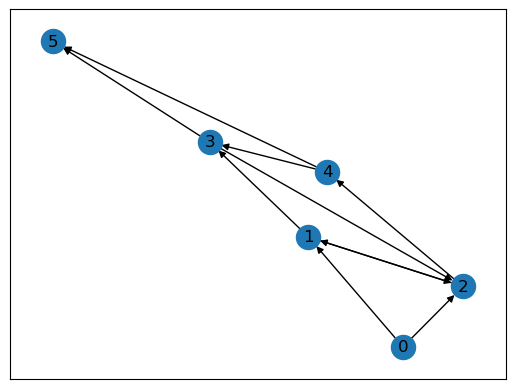

In [2]:
import networkx as nx
from collections import deque

# read
G = nx.read_weighted_edgelist("ff.edgelist", create_using=nx.DiGraph(), nodetype=int)
def find_augmentpath(N, s, t):
    P = [-1] * nx.number_of_nodes(N)
    visited = set()
    stack = deque()
    stack.appendleft(s)
    while stack:
        v = stack.popleft()
        if v == t:
            return P, True
        if not v in visited:
            visited.add(v)
            for w in N.neighbors(v):
                if not w in visited and N.edges[v, w]['weight'] > 0:
                    stack.appendleft(w)
                    P[w] = v
    return P, False


nx.draw_networkx(G)

find_augmentpath(G, 0, 5)

In [13]:
def restore_shortestpath(u, v, P):
    path = []
    temp = v
    while temp != u:
        parent = P[temp]
        path.apppend((parent,  temp))
        temp = parent
    path.reverse()
    return path

def min_capacity(N, path):
    min_cap = float("inf")
    for u, v in path:
        capacity = N.edges[u, v]["weight"]
        if capacity < min_cap:
            min_cap = capacity
    return min_cap


def increase_flow(N, path, amount, flow):
    # (u, v)について
    for u, v in path:
        #フローが0以下なら(u,v)フローをamountだけ打ち消す
        if flow[(u, v)] <= 0:
            flow[(u, v)] += amount
        #そうでないならマイナス処理
        else:
            flow[(u, v)] -= amount
        #N.edgesに(u, v) or (v, u)なかったら追加する
        if (u, v) not in N.edges:
            N.add_edge(u, v, weight=0)
        if (v, u) not in N.edges:
            N.add_edge(v, u, weight=0)
        #残余容量を増減する処理
        N.edges[u, v]["weight"] -= amount
        N.edges[v, u]["weight"] += amount


def my_Ford_Fulkerson(G, s, t):
    N = G.copy()
    f = {}
    for u, v in N.edges:
        f[(u, v)] = 0
        f[(v, u)] = 0
    P, is_found = find_augmentpath(N, s, t)
    while is_found:
        augmentpath = restore_shortestpath(s, t, P)
        min_cap = min_capacity(N, augmentpath)
        increase_flow(N, augmentpath, min_cap, f)
        P, is_found = find_augmentpath(N, s, t)
    return N, f

my_Ford_Fulkerson(G, 0, 5)

(<networkx.classes.digraph.DiGraph at 0x27922aed4d0>,
 {(0, 1): 0,
  (1, 0): 0,
  (0, 2): 0,
  (2, 0): 0,
  (1, 2): 0,
  (2, 1): 0,
  (1, 3): 0,
  (3, 1): 0,
  (2, 4): 0,
  (4, 2): 0,
  (3, 2): 0,
  (2, 3): 0,
  (3, 5): 0,
  (5, 3): 0,
  (4, 3): 0,
  (3, 4): 0,
  (4, 5): 0,
  (5, 4): 0})